In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("data.csv")
df.head(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
pp.ProfileReport(df)

In [4]:
# Названия колонок меняются из-за профайлера.
# https://github.com/pandas-profiling/pandas-profiling/issues/243
# Make columns same again!

df.columns = (['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'])

In [5]:
df.head(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
df.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
df.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [9]:
# Делим country-year на country и year
df["year"] = df["country-year"].str[-4:].astype("int")
df["country"] = df["country-year"].str[:-4]
# На случай повторного применения
try:
#     gdp_for_year - не число, конвертируем
    df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(",","").astype("int64")
except Exception as e:
    pass
# Много пустых значений. Удалить наблюдения не можем, их много, заменяем пустые нулями
df["HDI for year"] = df["HDI for year"].fillna(0)

df.sample(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country
11324,female,35-54 years,8,86183,9.28,Guyana2010,0.624,2273225042,3384,Generation X,2010,Guyana
7583,female,15-24 years,6,305722,1.96,Denmark2007,0.000,319423370134,62229,Millenials,2007,Denmark
11635,male,15-24 years,60,608253,9.86,Hungary2013,0.825,135215704419,14333,Millenials,2013,Hungary
7125,female,55-74 years,164,1035800,15.83,Czech Republic1992,0.000,34590052812,3573,Silent,1992,Czech Republic
12788,male,75+ years,542,1107700,48.93,Italy1985,0.738,450725816043,8329,G.I. Generation,1985,Italy
4785,male,55-74 years,269,807787,33.30,Bulgaria2005,0.749,29636617750,4003,Silent,2005,Bulgaria
26474,female,75+ years,0,6996,0.00,United Arab Emirates2010,0.828,289787338325,36964,Silent,2010,United Arab Emirates
16695,female,5-14 years,27,10379800,0.26,Mexico1995,0.670,360073909244,4505,Millenials,1995,Mexico
22339,male,75+ years,0,1015,0.00,Seychelles2010,0.743,969936525,11563,Silent,2010,Seychelles
2405,male,5-14 years,0,28300,0.00,Bahamas1994,0.000,3259000000,13073,Millenials,1994,Bahamas


In [10]:
df.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'year', 'country'],
      dtype='object')

In [11]:
# Кодируем категориальные переменные
labelEnc = LabelEncoder()
columns_for_encode = ["sex", "age", "country", "generation"]
for column in columns_for_encode:
    df[column + "_enc"] = labelEnc.fit_transform(df[column])
    
df.sample(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sex_enc,age_enc,country_enc,generation_enc
13711,female,5-14 years,34,5398000,0.63,Japan2013,0.890,5155717056271,42781,Generation Z,2013,Japan,0,3,46,3
21860,male,25-34 years,4,8930,44.79,Saint Vincent and Grenadines2010,0.711,681225963,6809,Generation X,2010,Saint Vincent and Grenadines,1,1,78,2
5141,female,75+ years,44,1156073,3.81,Canada2003,0.000,892380986368,29787,Silent,2003,Canada,0,5,18,5
24445,female,35-54 years,151,1169000,12.92,Sweden1993,0.000,209950792713,25880,Boomers,1993,Sweden,0,2,89,0
145,male,35-54 years,34,378826,8.98,Albania2001,0.000,4060758804,1451,Boomers,2001,Albania,1,2,0,0
23974,male,35-54 years,1521,2331906,65.23,Sri Lanka2000,0.679,16330814180,953,Boomers,2000,Sri Lanka,1,2,87,0
16028,male,55-74 years,4,35758,11.19,Malta2003,0.000,5456583589,14444,Silent,2003,Malta,1,4,56,5
18075,male,35-54 years,134,654050,20.49,Norway2003,0.000,228752436372,53533,Boomers,2003,Norway,1,2,64,0
14483,male,25-34 years,99,350200,28.27,Kyrgyzstan1990,0.615,2674000000,715,Boomers,1990,Kyrgyzstan,1,1,50,0
13274,female,75+ years,0,53489,0.00,Jamaica2002,0.000,9694169757,4013,Silent,2002,Jamaica,0,5,45,5


In [12]:
# Все колонки набора
df.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'year', 'country', 'sex_enc',
       'age_enc', 'country_enc', 'generation_enc'],
      dtype='object')

In [13]:
# Колонки для исключения из тренировочного набора 
# suicides_no - нужно ли исключать исходя из логики?... Ниже будет вариант с исключением этой переменной
del_cols = ([
    'country-year' #,
#     "suicides_no"
])

# Колонка для прогнозирования
target_col = ['suicides/100k pop']

# Итоговый сет для обучения
df2 = df.drop(columns_for_encode + del_cols, axis = 1)
df2.sample(15)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,sex_enc,age_enc,country_enc,generation_enc
20319,480,4456500,10.77,0.000,350051111253,8671,1992,1,0,73,2
24996,229,4396441,5.21,0.000,43096746122,911,1986,0,1,91,0
23897,47,2177807,2.16,0.000,1197789902774,27108,2015,0,0,86,4
25550,1,97999,1.02,0.000,13280275123,11066,2004,0,3,92,4
9199,964,5881000,16.39,0.000,1393982750473,25697,1994,0,4,33,5
26686,349,8405892,4.15,0.000,1768408273381,31630,2002,0,2,97,0
5431,4,1431319,0.28,0.000,81577430181,6023,1998,1,3,19,4
18873,8,530115,1.51,0.677,28965906502,5006,2013,0,1,67,4
13283,0,309548,0.00,0.000,9399447609,3852,2003,0,2,45,0
16294,1,7000,14.29,0.000,3558137040,3658,1994,1,5,57,1


In [14]:
# Делим на признаки и таргетную переменную
x_columns =[x for x in df2.columns if x != 'suicides/100k pop']
X = df2[x_columns]
y = df2.loc[:,['suicides/100k pop']].iloc[:,0].values

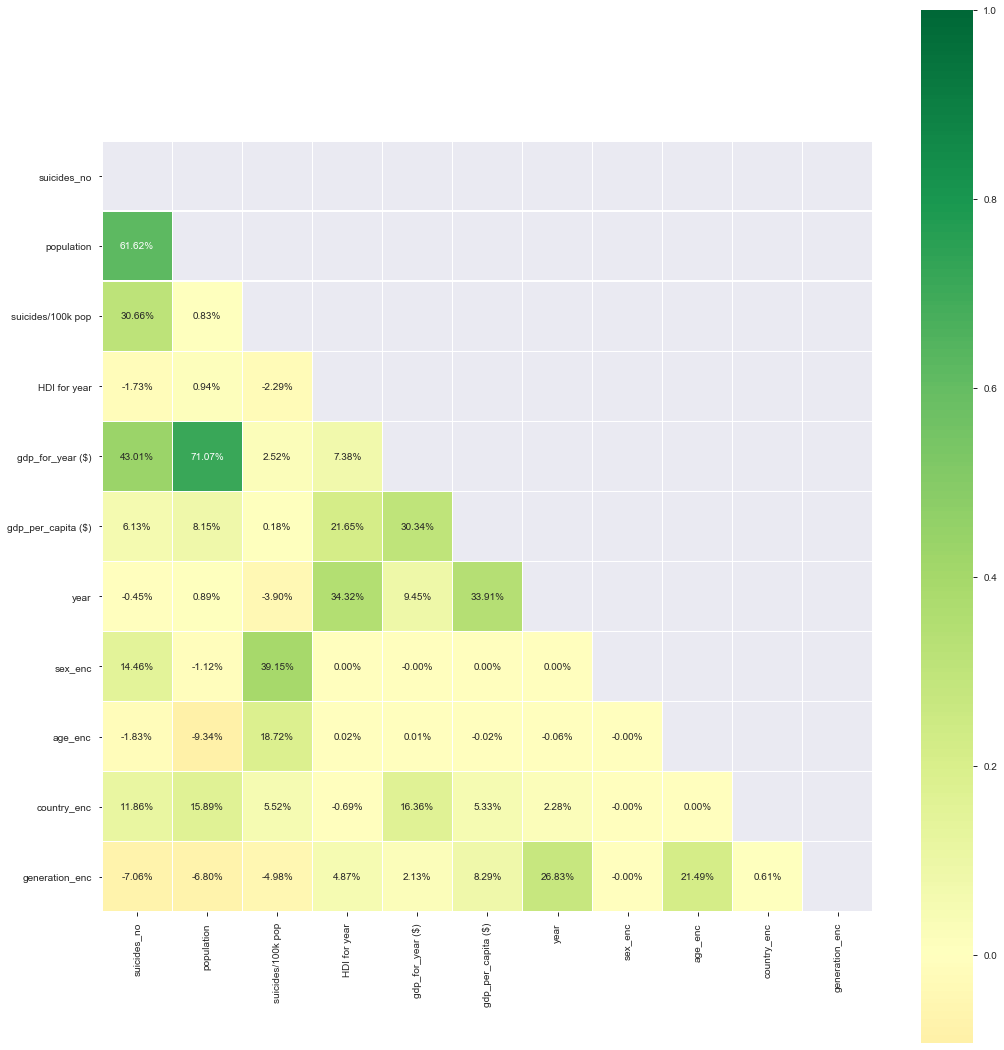

In [15]:
# Посмотрим на корреляции между переменными
plt.figure(figsize = (15,15))
corr = df2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        fmt="0.2%",
        linewidths=0.2,
        square=True,
        center=0
)
plt.tight_layout()
plt.show()

In [16]:
# Делим сет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [17]:
# Создаем модель деревья решений
# Выбираем 100 деревьев в качестве параметра
model=RandomForestRegressor(n_estimators=100)

# Обучаем модель
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

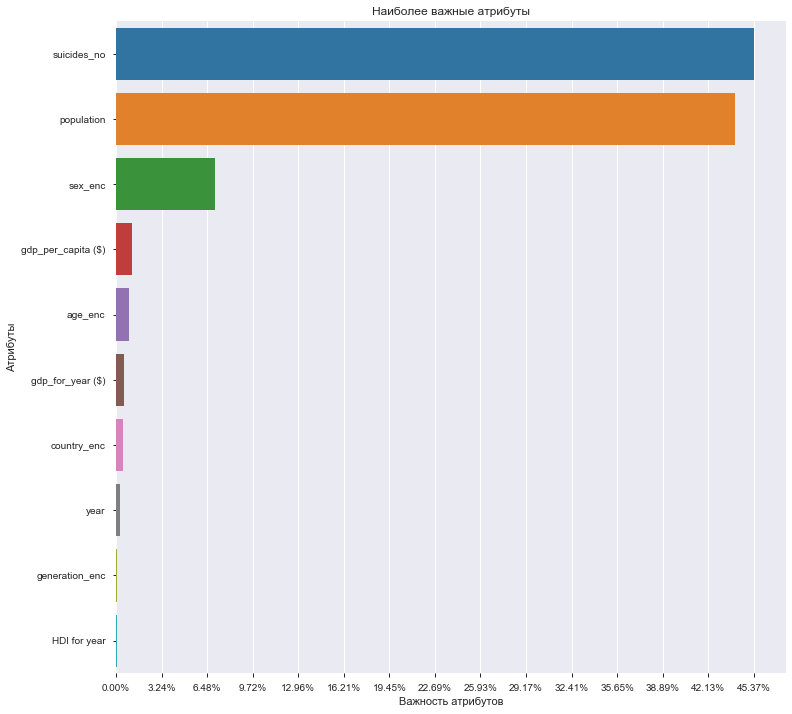

,0
suicides_no,0.453746
population,0.440585
sex_enc,0.070354
gdp_per_capita ($),0.011534
age_enc,0.009217
gdp_for_year ($),0.005626
country_enc,0.004676
year,0.002922
generation_enc,0.000886
HDI for year,0.000453


In [18]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

# Важность на графике
plt.show()
# И в DataFrame
pd.DataFrame(feature_imp)

In [19]:
# Real vc Prediction

# Значения y из тестовой выборки 
y_vals = pd.DataFrame({"suicides/100k pop":y_test})
# Предсказанные значения
y_vals["Prediction"] = model.predict(X_test).tolist()
y_vals.sort_values(by="suicides/100k pop", inplace= True)

y_vals.sample(15)

,suicides/100k pop,Prediction
2224,0.00,0.0000
1055,0.96,0.9463
12641,4.12,4.1158
1069,40.11,38.7582
2547,66.09,66.5097
8790,1.67,1.7123
12699,0.00,0.0000
4682,10.91,11.0830
2842,2.72,2.8068
11630,0.60,0.6028


In [20]:
# Метрики предсказания модели

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

regression_metrics = ([
    "explained_variance_score",
    "max_error",
    "mean_absolute_error",
    "mean_squared_error",
    "mean_squared_log_error",
    "median_absolute_error",
    "r2_score"
])

metrics = {}
for metric in regression_metrics:
    result = globals()[metric](y_vals.iloc[:,0].values, y_vals.iloc[:,1].values)
    metrics[metric] = result
# Выведем метрики
pd.DataFrame(metrics, index=[0]).T

,0
explained_variance_score,0.982040
max_error,139.174800
mean_absolute_error,0.457725
mean_squared_error,6.342694
mean_squared_log_error,0.001329
median_absolute_error,0.054100
r2_score,0.982007


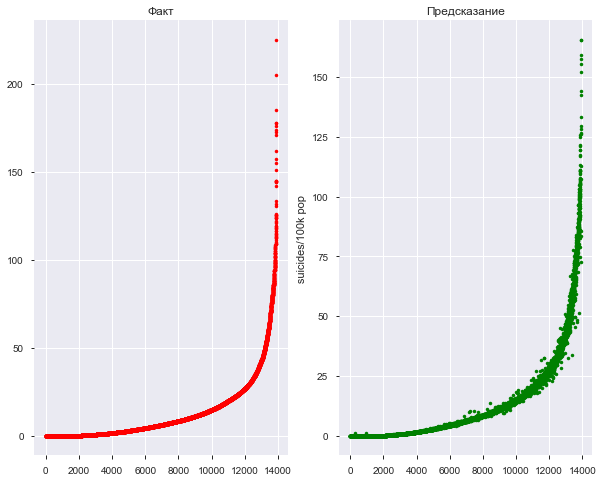

In [21]:
# Визуализация предсказаний
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax = axes.flatten()
plt.ylabel("suicides/100k pop")
x_line = list(range(0,len(y_test)))
ax[0].plot(x_line, y_vals.iloc[:,0].values, "r.")
ax[1].plot(x_line, y_vals.iloc[:,1].values, "g.")

ax[0].set_title("Факт")
ax[1].set_title("Предсказание")
plt.show()

### Исключаем колонку *suicides_no*  
Хотя в описании нужно вроде бы как просто предсказать кол-во суицидов на 1000 человек, складывается ощущение, что зная точное кол-во смертей за год, задача сильно упрощается, что является "читерством".
Попробуем исключить эту колонку.

In [22]:
# Колонки для исключения из признаков 
del_cols = ([
    'country-year',
     "suicides_no"
])
# Таргетная колонка
target_col = ['suicides/100k pop']
df2 = df.drop(columns_for_encode + del_cols, axis = 1)

df2.sample(15)

,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,sex_enc,age_enc,country_enc,generation_enc
10566,9947,10.05,0.000,695370296,7422,2005,1,2,37,0
22323,1926,0.00,0.000,847397850,10157,2009,0,5,81,5
7718,52900,11.34,0.000,13945431882,1669,1987,1,5,28,1
9185,4331900,33.66,0.000,1322815612694,24521,1993,1,1,33,0
20854,1977886,35.59,0.785,166658327827,8190,2010,1,4,74,5
18686,475395,5.89,0.000,9024567484,2057,1998,1,2,67,0
3550,968900,39.01,0.000,246194938751,25922,1994,1,4,12,5
19783,310130,1.93,0.000,36922456000,11146,1993,0,0,71,2
27334,300610,8.32,0.000,20515543039,6914,1996,0,4,99,5
25995,51484,0.00,0.000,20214385965,4508,2009,0,5,94,5


In [23]:
# Делим данные на признаки и целевые значения
x_columns =[x for x in df2.columns if x != 'suicides/100k pop']
X = df2[x_columns]
y = df2.loc[:,['suicides/100k pop']].iloc[:,0].values

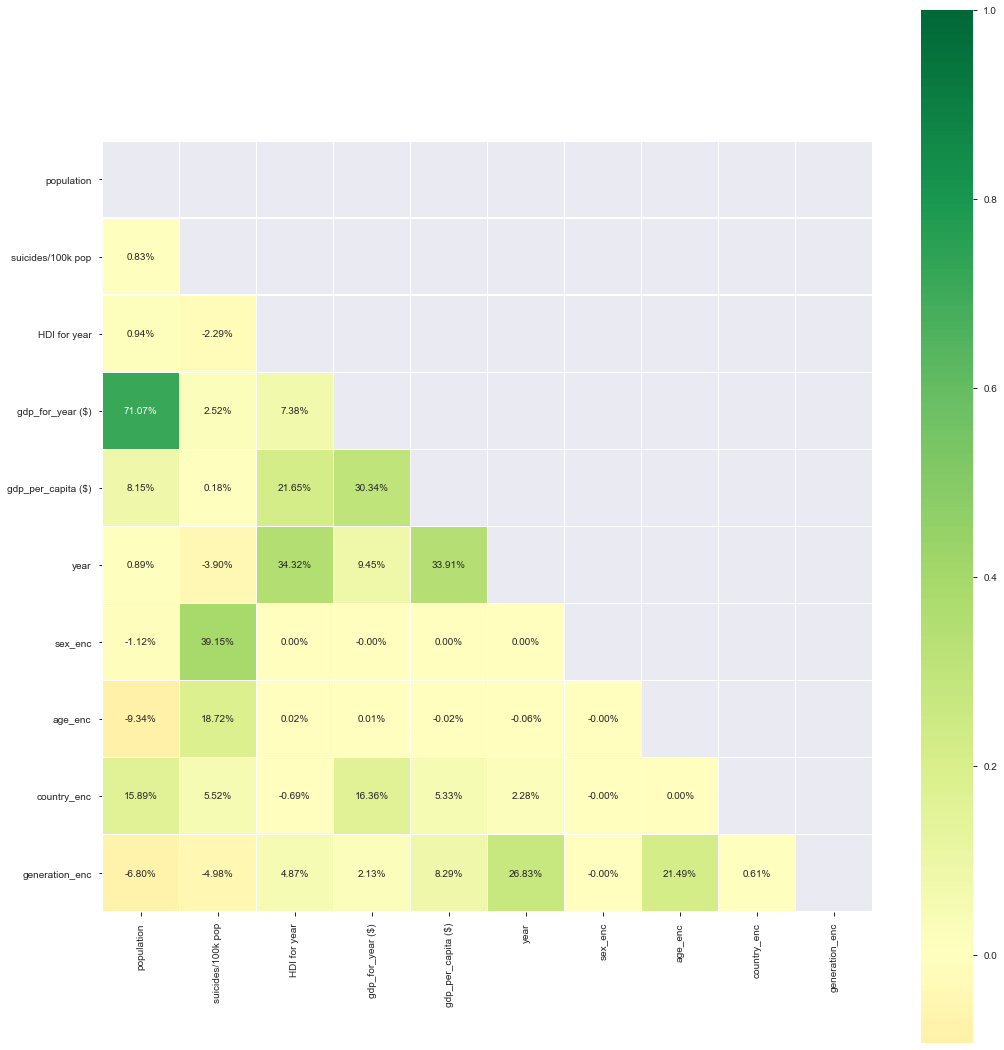

In [24]:
# Посмотрим на кореляции между признаками
plt.figure(figsize = (15,15))
corr = df2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr, 
        mask=mask, 
        annot=True, 
        cmap='RdYlGn', 
        fmt="0.2%", 
        linewidths=0.2, 
        square=True, 
        center=0
)
plt.tight_layout()
plt.show()

In [25]:
# Делим данные на тренировочные и тестовые 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [26]:
# Создаем модель деревья решений
# Выбираем 100 деревьев в качестве параметра
model=RandomForestRegressor(n_estimators=100)

# Обучаем модель
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

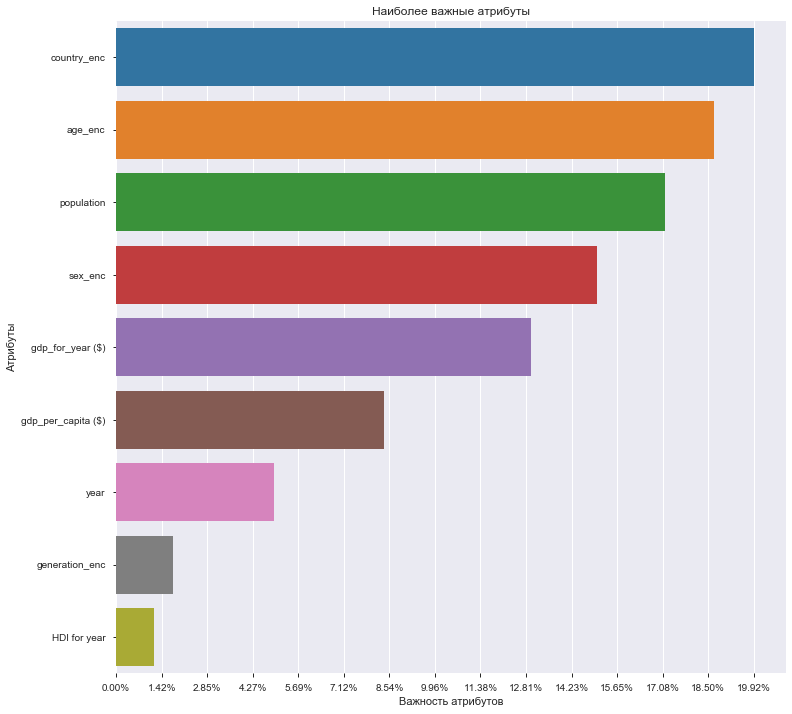

,0
country_enc,0.199224
age_enc,0.186929
population,0.171547
sex_enc,0.150221
gdp_for_year ($),0.129687
gdp_per_capita ($),0.083607
year,0.049414
generation_enc,0.017666
HDI for year,0.011706


In [27]:
headers = list(X_train.columns.values)
# Значимость признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)

x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# На графике
plt.show()
# В DataFrame
pd.DataFrame(feature_imp)

In [28]:
# Real vc Prediction

# Реальные значения
y_vals = pd.DataFrame({"suicides/100k pop":y_test})
# Предсказанные значения
y_vals["Prediction"] = model.predict(X_test).tolist()
y_vals.sort_values(by="suicides/100k pop", inplace= True)

y_vals.sample(15)

,suicides/100k pop,Prediction
10088,5.04,5.3378
8577,11.77,9.9171
540,20.30,23.2989
8890,1.78,3.0163
13829,3.90,6.4562
10511,32.92,35.8857
13323,0.82,0.5795
7348,2.77,12.2589
9470,0.54,0.4312
2006,0.15,0.2408


In [29]:
# Метрики предсказания модели

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

regression_metrics = ([
    "explained_variance_score",
    "max_error",
    "mean_absolute_error",
    "mean_squared_error",
    "mean_squared_log_error",
    "median_absolute_error",
    "r2_score"
])

metrics = {}
for metric in regression_metrics:
    result = globals()[metric](y_vals.iloc[:,0].values, y_vals.iloc[:,1].values)
    metrics[metric] = result

    # Выведем метрики
pd.DataFrame(metrics, index=[0]).T

,0
explained_variance_score,0.824608
max_error,204.690500
mean_absolute_error,3.469012
mean_squared_error,61.830577
mean_squared_log_error,0.387566
median_absolute_error,1.333050
r2_score,0.824597


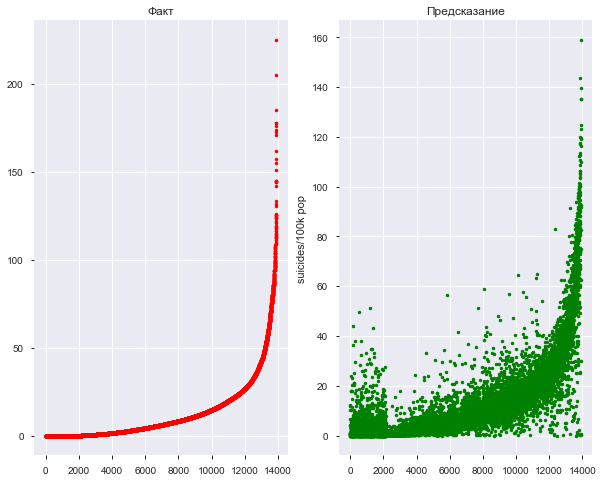

In [30]:
# Визуализация предсказаний
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax = axes.flatten()
plt.ylabel("suicides/100k pop")
x_line = list(range(0,len(y_test)))
ax[0].plot(x_line, y_vals.iloc[:,0].values, "r.")
ax[1].plot(x_line, y_vals.iloc[:,1].values, "g.")

ax[0].set_title("Факт")
ax[1].set_title("Предсказание")
plt.show()

Исключив колонку *suicides_no*, точность значительно упала.  
С другой стороны, возможно правильней колонку исключать, т.к в реальности мы вряд ли будем знать значение этой величины на момент прогноза.

#### The end